## Z-Transform and Discrete LTI Systems - Exercises
---

### Exercise 1
---

Consider an $M$-Point moving average (MA) filter with the difference equation
$$
y[n] = \frac{1}{M}\left(x[n]+x[n-1]+\ldots + x[n-M+1]\right)
$$

> (a) Plot the frequency response for $M=3,\ldots,10$

> (b) Sample a 1000HZ-sin-signal with 4000Hz. Filter this signal with a 4-Point MA filter.

### Solution 1
---

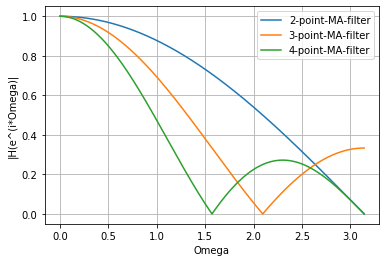

In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

for M in range(2,5):
    b = [1/M for i in range(M)] # np.ones(M)*1/M
    a = [0 for i in range(M)] # np.zeros(M)
    a[0] = 1
    sys_M_point = signal.TransferFunction(b,a,dt=True)
    w, H = signal.dfreqresp(sys_M_point)
    plt.plot(w,np.abs(H),label='{}-point-MA-filter'.format(M))
plt.legend()
plt.grid()
plt.xlabel('Omega')
plt.ylabel('|H(e^(i*Omega)|')
plt.show()

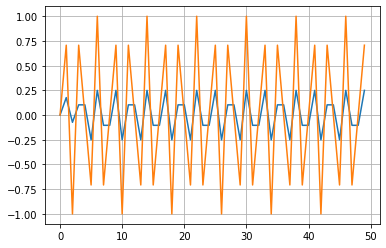

In [5]:
# (b) Generate system
M = 4
b = [1/M for i in range(M)]
a = [0 for i in range(M)]
a[0] = 1
sys_4_point  = signal.TransferFunction(b,a,dt=True)
# Generate Signal
T = 2
f_s = 4000
t = np.arange(0,T,1/f_s)
x = np.sin(2*np.pi*1500*t)
t, y = signal.dlsim(sys_4_point,x)
plt.plot(y[:50])
plt.plot(x[:50])
plt.grid()

### Exercise 2
---
Consider a system with transfer function
$$
H(z) = \frac{1}{1+\frac{0.9^2}{z^2}} = \frac{z^2}{z^2+0.9^2}
$$
> (a) Find the corresponding difference equation.

> (b) Generate a pole-zero plot.

> (c) Simulate the impulse response

> (d) Implement the impulse response via a python script.

> (e) Determine the Bode magnitude und phase plot.

> (f) Simulate the the output $y[n]$ given the input $x[n]=\sin(\frac{\pi}{2}n)$

### Solution 2
---

> (a) The difference equation reads
$$
y[n]+0.9^2y[n-2] = x[n]
$$
> (b) We obtain 

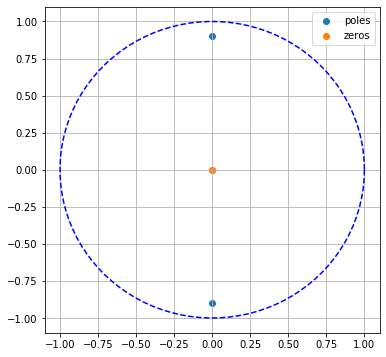

In [7]:
sys2 = signal.TransferFunction([1,0,0],[1,0,0.9**2],dt=True)

plt.figure(figsize=(6,6))
plt.scatter(sys2.to_zpk().poles.real,sys2.to_zpk().poles.imag,label='poles')
plt.scatter(sys2.to_zpk().zeros.real,sys2.to_zpk().zeros.imag,label='zeros')
plt.plot([np.cos(t) for t in np.linspace(0,2*np.pi,100)],[np.sin(t) for t in np.linspace(0,2*np.pi,100)],'b--')
plt.legend()
plt.grid()

> (c) Simulation of the impulse response using scipy.signal.

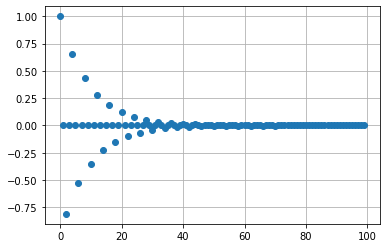

In [5]:
t,h = signal.dimpulse(sys2)
h = np.squeeze(h)
plt.plot(t[:100],h[:100],'o')
plt.grid()
plt.show()

> (d) One possible implementation of the impulse response reads:

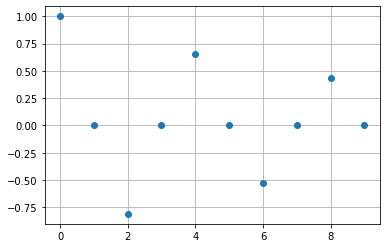

In [6]:
x = np.zeros(10)
x[0] = 1
h = np.zeros(10)
###################################
# Set the first two values manually
###################################
h[0] = 1 # h[0] = x[0] - h[-2] = 1 - 0 = 1
h[1] = 0 # h[1] = x[1] - h[-1] = 0 - 0 = 0
for n in range(2,10):
    h[n] = x[n] - 0.9**2*h[n-2]
plt.plot(h,'o')
plt.grid()
plt.show()

> (e) Bode magnitude and phase plot:

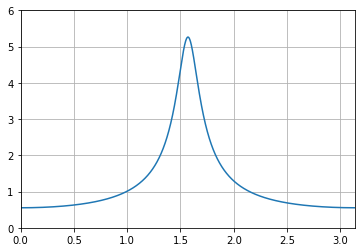

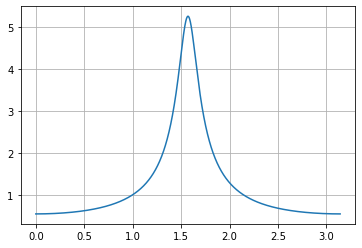

In [10]:
w,H = signal.dfreqresp(sys2)
plt.plot(w,np.abs(H))
plt.grid()
plt.axis([0,np.pi,0,6])
plt.show()
plt.plot(w,np.abs(H))
plt.grid()
plt.show()

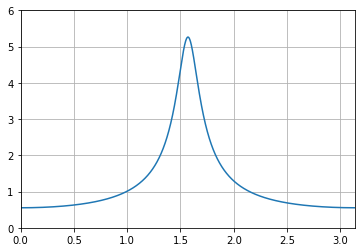

In [8]:
w,H = signal.dfreqresp(sys2)
plt.plot(w,np.abs(H))
plt.axis([0,np.pi,0,6])
plt.grid()

> (f) We simulate the output given the input 

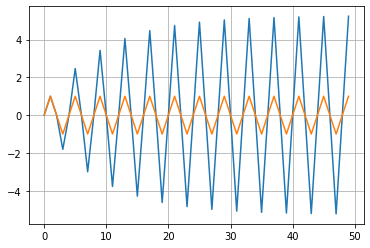

In [12]:
x = [np.sin(np.pi/2*n) for n in range(50)]
t, y = signal.dlsim(sys2,x)
plt.plot(y)
plt.plot(x)
plt.grid()

### Exercise 3
---

Consider an LTI system with the following difference equation
$$
y[n] - \frac{3}{2}y[n-1]-y[n-2]=x[n-1]
$$

> (a) Find the transfer function $H(z)$.

> (b) Determine the impulse respone $h[n]$ analytically and simulate the impulse response using scipy.signal.

### Solution 3
---

> (a) The transfer function is given by
$$
H(z) = \frac{\frac{1}{z}}{1-\frac{3}{2}\frac{1}{z}-\frac{1}{z^2}} = 
\frac{z}{z^2-\frac{3}{2}z-1} = \frac{z}{(z-2)(z+\frac{1}{2})} = 
\frac{2}{5}\left(\frac{z}{z-2}-\frac{z}{z+\frac{1}{2}}\right)
$$
> (b) The impulse response is given by
$$
h[n] = \frac{2}{5} \left(2^n-\left(-\frac{1}{2}\right)^n\right)u[n]
$$

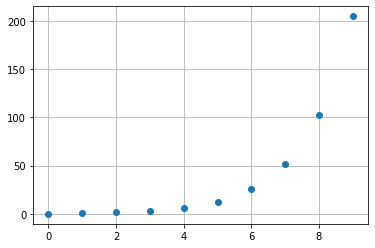

In [13]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Simulate impulse response using python
sys1 = signal.ZerosPolesGain([0],[2.0,-0.5],1,dt=True)
t,h = signal.dimpulse(sys1)
h = np.squeeze(h)
plt.plot(t[:10],h[:10],'o')
# compare to analytical result
#plt.plot([2/5*(2**n-(-1/2)**n) for n in range(10)])
plt.grid()

plt.show()

In [3]:
sys1.to_zpk()

ZerosPolesGainDiscrete(
array([0]),
array([ 2. , -0.5]),
1,
dt: True
)